In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#Set matplotlib style options
marker_size = 10
mpl.rcParams['lines.linewidth'] = 2
#plt.style.use('ggplot')
mpl.rc('text', usetex=True)
mpl.rc('font', **{'family': 'serif', 
                  'size': 12, 
                  'weight': 'bold'})
#mpl.rcParams["savefig.dpi"] = 300

# Greenland Plots

In [32]:
def plot_timeseries_GL(name, data, x_coord, y_coord):
    # Open the dataset
    ds = nc.Dataset(data_file)

    # Get the nearest x, y 
    x = ds.variables['x'][:]
    y = ds.variables['y'][:]
    x_index = (np.abs(x - (x_coord))).argmin()
    y_index = (np.abs(y - (y_coord))).argmin()

    # Print the values at the indexes to check
    print(x_coord, " -> ", x[x_index])
    print(y_coord, " -> ", y[y_index])

    # Get the dates and velocities
    dates = np.asarray([group[0:8] for group in ds.groups.keys()])
    velocities = np.asarray([ds.groups[group].variables['V'][y_index, x_index] for group in ds.groups.keys()])

    # Set velocity to nan if it is <= -99999 (missing data)
    velocities[velocities <= -99999] = np.nan

    # Sort the dates and velocities by date & plot
    isort = np.argsort(dates)
    plt.plot(dates[isort], velocities[isort])

    # Rotate the x-axis labels and only show every 10th label
    plt.xticks(rotation=70)
    for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
        if index % 10 != 0:
            label.set_visible(False)

    # Set the title and axis labels
    plt.title(name + ' Velocity\nCoordinates: ' + str(x[x_index]) + ', ' + str(y[y_index]), fontsize=20)
    plt.ylabel('Velocity (m/yr)')
    #plt.ylim(6000, 13000)

    plt.show()
    ds.close()
    
    return


## Jakobshavn

lon,    lat

x,      y

-179473.599079, -2279614.420492

-179473.599079  ->  -179525.0
-2279614.420492  ->  -2279525.0


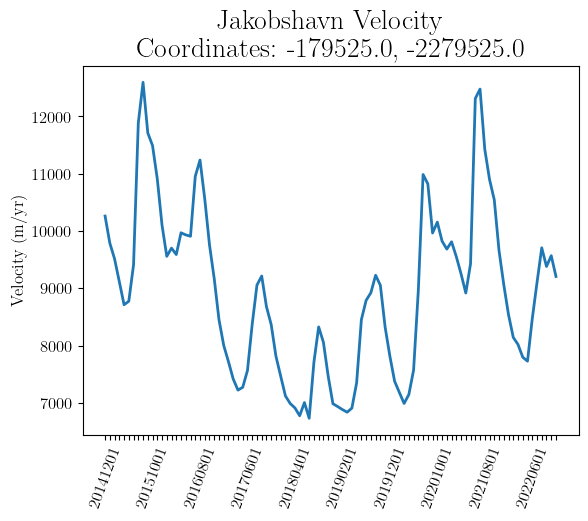

In [37]:
data_file = '/Users/tara/Documents/SJSU/MLML/Test Data/Greenland MEaSUREs Monthly Mosaic Velocity Grids Jakobshavn_BM5.nc'
x_coord = -179473.599079
y_coord = -2279614.420492

plot_timeseries_GL('Jakobshavn', data_file, x_coord, y_coord)

## Helheim

305140.494960, -2577294.313509

305140.49496  ->  305275.0
-2577294.313509  ->  -2577425.0


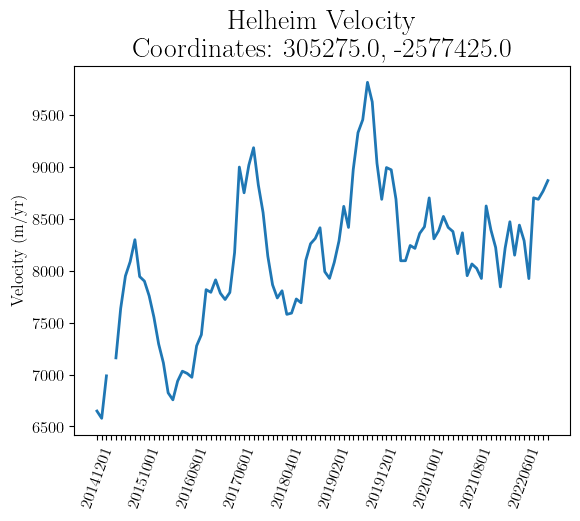

In [36]:
data_file = '/Users/tara/Documents/SJSU/MLML/Test Data/Greenland MEaSUREs Monthly Mosaic Velocity Grids Helheim.nc'
x_coord = 305140.494960
y_coord = -2577294.313509

plot_timeseries_GL('Helheim', data_file, x_coord, y_coord)

# Antarctica Plots

In [54]:
data_file = "/Volumes/Seagate/CHANGES/data_repository/tutorial/Antarctic/Velocity/MEaSUREs Antarctic Annual Velocity/Data/output_files/MEaSUREs Antarctic Annual Velocity_Antarctica_stack.nc"

In [55]:
def plot_timeseries_AA(name, data, x_coord, y_coord):
    # Open the dataset
    ds = nc.Dataset(data)

    # Get the x, y value closest to given coords
    x = ds.variables['x'][:]
    y = ds.variables['y'][:]
    x_index = (np.abs(x - (x_coord))).argmin()
    y_index = (np.abs(y - (y_coord))).argmin()

    # Print the values at the indexes to check
    print(x_coord, y_coord)
    print(x[x_index], y[y_index])

    # Get the dates and velocities
    dates = np.asarray([group[0:4] for group in ds.groups.keys()])
    velocities = np.asarray([ds.groups[group].variables['VV'][y_index, x_index] for group in ds.groups.keys()])

    # Set velocity to nan if it is <= -99999 (missing data)
    velocities[velocities <= -99999] = np.nan

    # Sort the dates and velocities by date & plot
    isort = np.argsort(dates)
    plt.plot(dates[isort], velocities[isort])

    plt.xticks(rotation=70)

    plt.title(name + '\nCoordinates: ' + str(x[x_index]) + ', ' + str(y[y_index]), fontsize=20)
    plt.ylabel('Velocity (m/yr)')
    #plt.ylim(900, 4900)

    plt.show()
    ds.close()
    return

## Pine Island

-1595516.237544 -281115.048774
-1595725.1 -280988.9


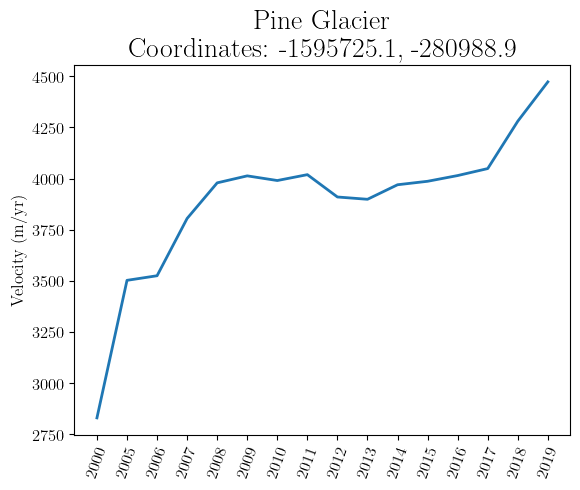

In [56]:
# Pine glacier estimation 
x_coord = -1595516.237544
y_coord = -281115.048774
name = 'Pine Glacier'
plot_timeseries_AA(name, data_file, x_coord, y_coord)

## Thwaites Glacier

-1538753.995998 -474419.544032
-1538725.1 -473988.9


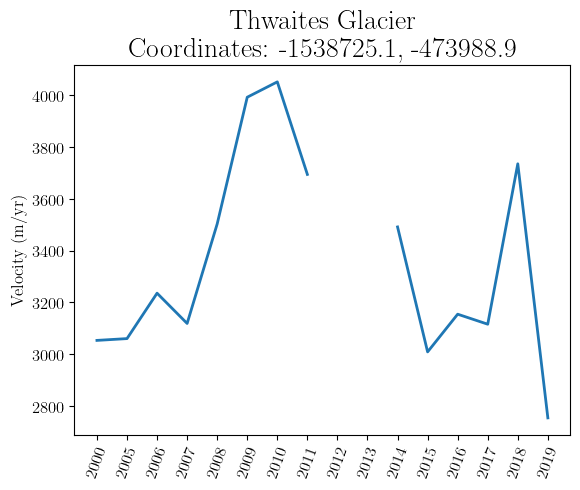

In [57]:
x_coord = -1538753.995998
y_coord = -474419.544032
name = 'Thwaites Glacier'

plot_timeseries_AA(name, data_file, x_coord, y_coord)

-1566047.846186 -480819.313299
-1565725.1 -480988.9


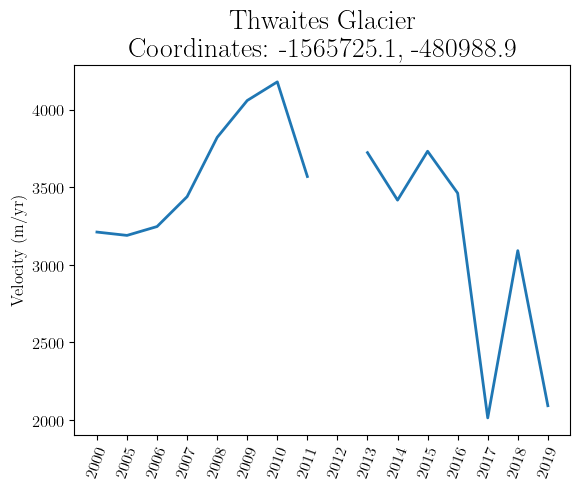

In [60]:
x_coord = -1566047.846186   #-107°4'4.481"
y_coord = -480819.313299    #-75°0'19.07"
plot_timeseries_AA('Thwaites Glacier', data_file, x_coord, y_coord)

-1536736.960557 -470930.2118859
-1536725.1 -470988.9


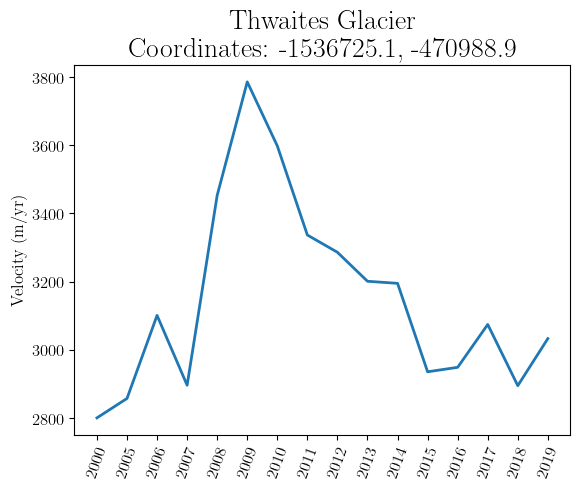

In [61]:
x_coord = -1536736.960557   # -107°2'15.313"
y_coord = -470930.2118859   # -75°17'7.174"
plot_timeseries_AA('Thwaites Glacier', data_file, x_coord, y_coord)

-1400898.584549 -356092.254212
-1400725.1 -355988.9


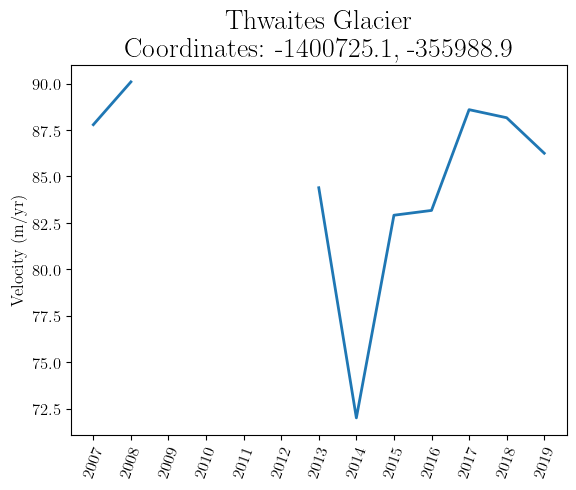

In [63]:
x_coord = -1400898.584549   # -104°15'42.784"
y_coord = -356092.254212  # -76°45'12.705"
plot_timeseries_AA('Thwaites Glacier', data_file, x_coord, y_coord)

-1468747.7711801464 -476428.42715800117
-1468725.1 -475988.9


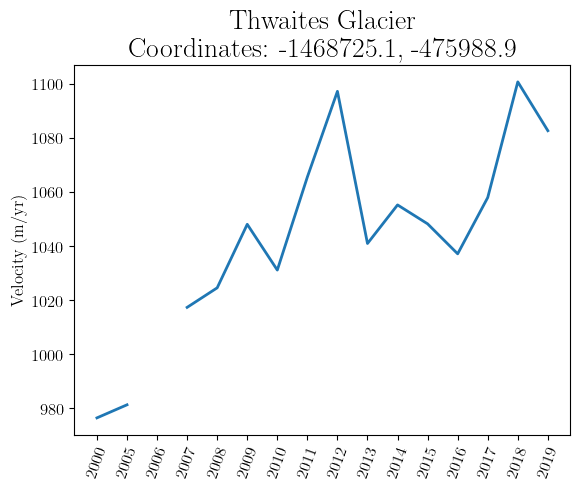

In [64]:
x_coord = -1468747.7711801464   #-107°58'18.789"
y_coord = -476428.42715800117   #-75°51'29.107"
plot_timeseries_AA('Thwaites Glacier', data_file, x_coord, y_coord)